# Setup

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# DBSCAN

density-based spatial clustering of applications with noise.

In [2]:
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [3]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [4]:
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [5]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [6]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [7]:
def plot_dbscan(dbscan, X, size = [100, 40]):
    cores = dbscan.components_
    anomalies = X[dbscan.labels_ == -1]
    bound_index = list(set(np.where(dbscan.labels_ != -1)[0]).symmetric_difference(dbscan.core_sample_indices_))
    boundaries = X[bound_index]

    plt.scatter(cores[:, 0], cores[:, 1], marker='^', s=size[0],# edgecolors='k',
                c=dbscan.labels_[dbscan.core_sample_indices_], cmap=plt.cm.Paired)

    plt.scatter(boundaries[:, 0], boundaries[:, 1], marker='o', s=size[1], edgecolors='k',
                c=dbscan.labels_[bound_index], cmap=plt.cm.Paired)

    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=size[0])
    plt.xlabel("X1", fontsize=16)
    plt.ylabel("X2", fontsize=16)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=16)

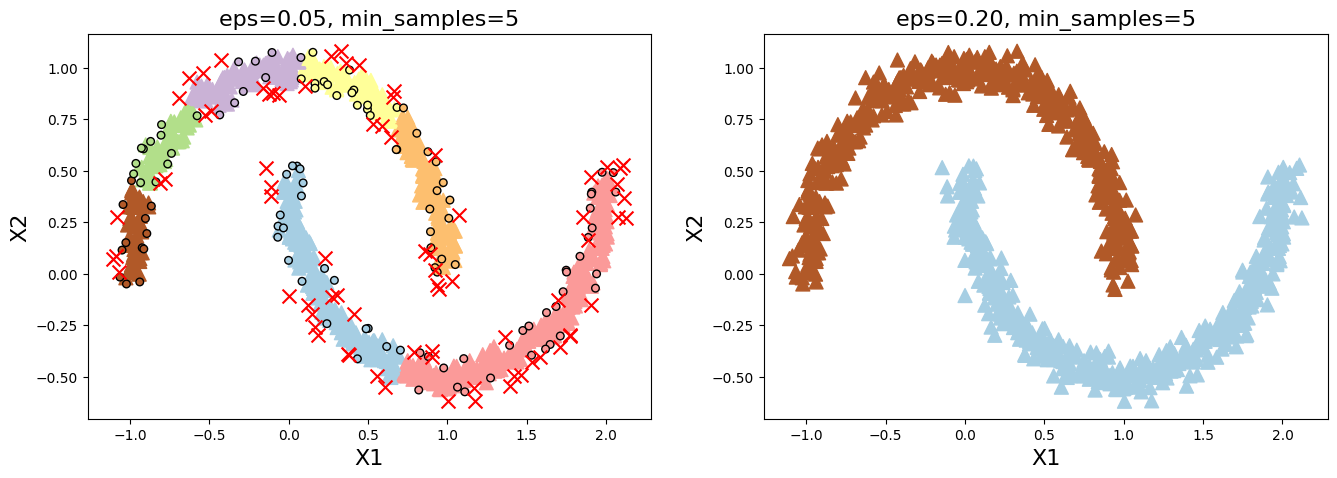

In [8]:
plt.figure(figsize=(16, 5))

plt.subplot(121)
plot_dbscan(dbscan, X, [100, 30])

plt.subplot(122)
plot_dbscan(dbscan2, X, [100, 50])

plt.show()

predition

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

[6 0 3 2]
[[0.24 0.   0.   0.   0.   0.   0.76]
 [1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.3  0.7  0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.  ]]


# Agglomerative Clustering

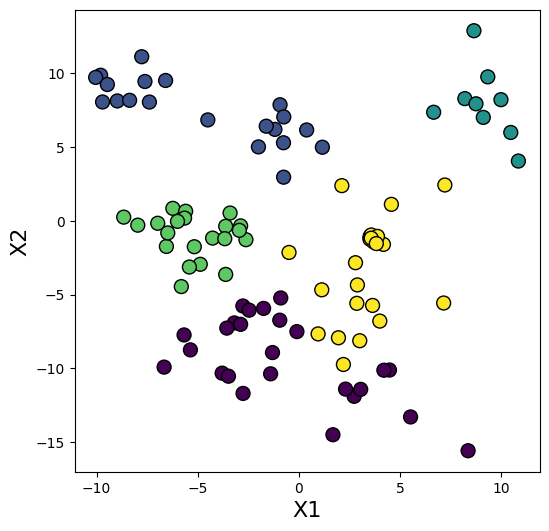

In [11]:
from sklearn.cluster import AgglomerativeClustering

rng = np.random.RandomState(42)
X, y = make_blobs(n_samples=100, centers=10, random_state=rng, cluster_std=[rng.gamma(2) for i in range(10)])

agg = AgglomerativeClustering(n_clusters=5)
assignment = agg.fit_predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c = assignment, s = 100, edgecolors='k')
plt.xlabel("X1", fontsize = 16)
plt.ylabel("X2", fontsize = 16)
plt.show()

ward : [25 25 21 20  9]
average : [47 32 10 10  1]
complete : [39 20 19 15  7]
single : [89  8  1  1  1]


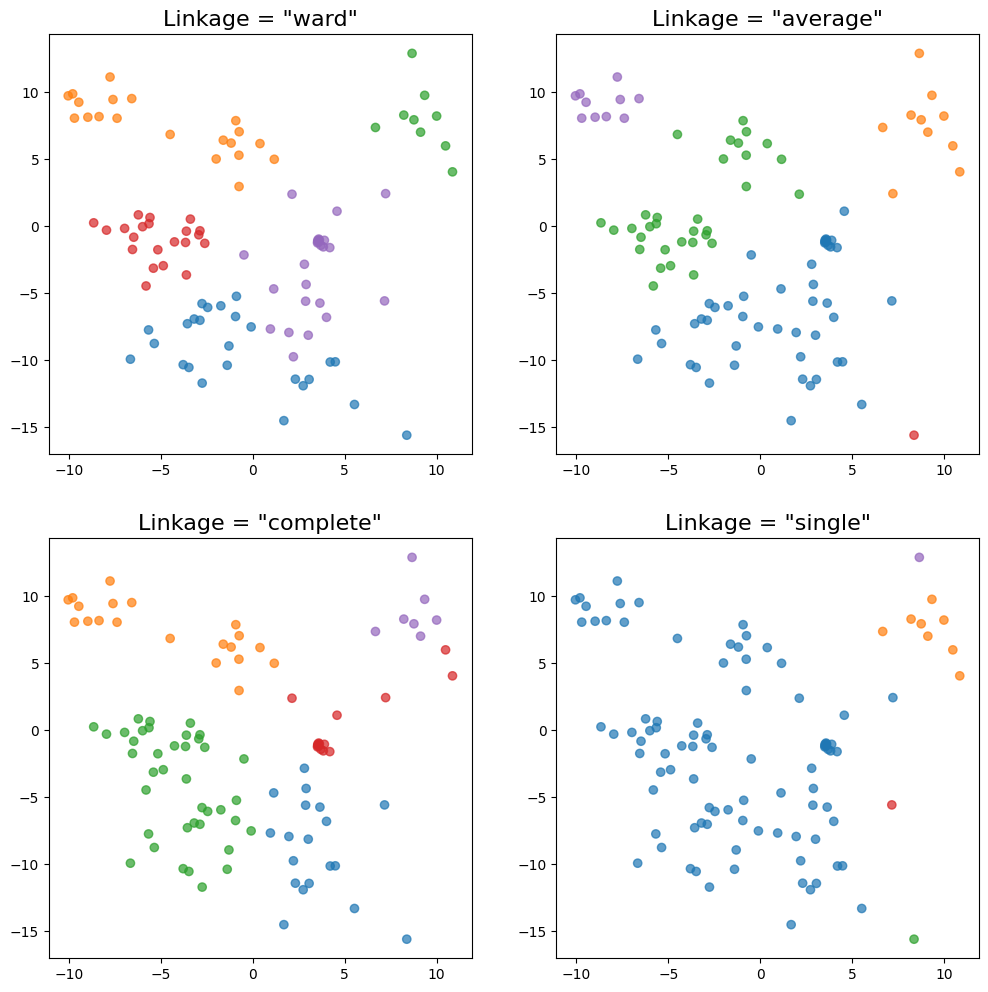

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, linkage in enumerate(["ward", "average", "complete", "single"]):
    agg = AgglomerativeClustering(n_clusters=5, linkage=linkage)
    agg.fit(X)
    plt.sca(axes[i // 2, i % 2])
    plt.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(agg.labels_), alpha=.7)
    plt.title('Linkage = "{}"'.format(linkage), fontsize = 16)
    print('{} : {}'.format(linkage, np.sort(np.bincount(agg.labels_))[::-1]))

### Hierarchical Clustering and Dendrograms

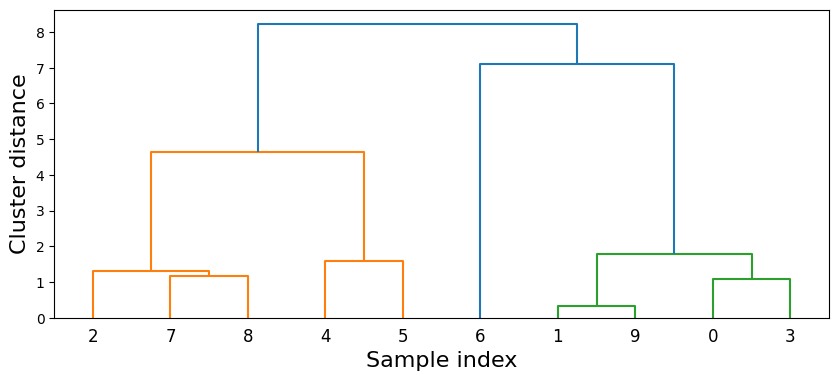

In [13]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=10)
# ward from scipy returns an array that specifies the distances bridged when performing agglomerative clustering
linkage_array = ward(X)
plt.figure(figsize=(10,4))
dendrogram(linkage_array)
plt.xlabel("Sample index", fontsize = 16)
plt.ylabel("Cluster distance", fontsize = 16)
plt.show()

In [14]:
linkage_array

array([[ 1.        ,  9.        ,  0.3320945 ,  2.        ],
       [ 0.        ,  3.        ,  1.07256525,  2.        ],
       [ 7.        ,  8.        ,  1.1803787 ,  2.        ],
       [ 2.        , 12.        ,  1.30311575,  3.        ],
       [ 4.        ,  5.        ,  1.57548394,  2.        ],
       [10.        , 11.        ,  1.78595107,  4.        ],
       [13.        , 14.        ,  4.64808837,  5.        ],
       [ 6.        , 15.        ,  7.11104864,  5.        ],
       [16.        , 17.        ,  8.21467052, 10.        ]])

# Using Clustering

**Image Segmentation**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
from matplotlib.image import imread
image = imread('/content/drive/MyDrive/ColabNotebooks/images/ladybug.png')
image.shape

(533, 800, 3)

In [18]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto').fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [19]:
kmeans.cluster_centers_

array([[0.04475604, 0.15489878, 0.00846412],
       [0.963986  , 0.8830466 , 0.02841768],
       [0.50290626, 0.5575619 , 0.23476031],
       [0.2107073 , 0.3779181 , 0.05732005]], dtype=float32)

In [20]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [21]:
kmeans.cluster_centers_[kmeans.labels_]

array([[0.04475604, 0.15489878, 0.00846412],
       [0.04475604, 0.15489878, 0.00846412],
       [0.04475604, 0.15489878, 0.00846412],
       ...,
       [0.04475604, 0.15489878, 0.00846412],
       [0.04475604, 0.15489878, 0.00846412],
       [0.04475604, 0.15489878, 0.00846412]], dtype=float32)

In [22]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

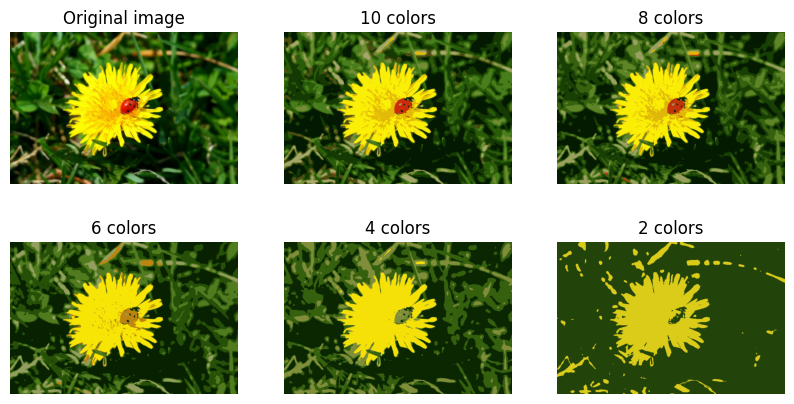

In [23]:
plt.figure(figsize=(10,5))

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

**Proprocessing**

In [24]:
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [25]:
pipeline1 = Pipeline([
    ("log_reg", LogisticRegression(multi_class="ovr",  max_iter=5000, random_state=42)),
])
pipeline1.fit(X_train, y_train)
pipeline1.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9688888888888889

In [26]:
pipeline2 = Pipeline([
    ("kmeans", KMeans(n_clusters=60, random_state=42, n_init='auto')),
    ("log_reg", LogisticRegression(multi_class="ovr",  max_iter=5000, random_state=42)),
])
pipeline2.fit(X_train, y_train)
pipeline2.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.98

**Semi-supervised Learning**

In [27]:
# only use 50 samples to train the model
pipeline1 = Pipeline([
    ("log_reg", LogisticRegression(multi_class="ovr",  max_iter=5000, random_state=42)),
])
pipeline1.fit(X_train[:50], y_train[:50])
pipeline1.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8333333333333334

First clustering the whole training set into 50 clusters, then find images closet to the cluster centroid.

In [28]:
kmeans = KMeans(n_clusters=50, random_state=42, n_init='auto')
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

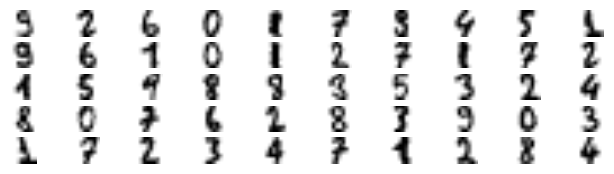

In [29]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(5, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [30]:
# manually update the labels
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 2, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [31]:
pipeline1 = Pipeline([
    ("log_reg", LogisticRegression(multi_class="ovr",  max_iter=5000, random_state=42)),
])
# 50 training instances
pipeline1.fit(X_representative_digits, y_representative_digits)
pipeline1.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.10222222222222223

In [32]:
# propagate labels to all the other instances in the same cluster
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(50):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [33]:
pipeline1 = Pipeline([
    ("log_reg", LogisticRegression(multi_class="ovr",  max_iter=5000, random_state=42)),
])
# training all instances
pipeline1.fit(X_train, y_train_propagated)
pipeline1.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.09777777777777778

# Gaussian Mixtures

In [34]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

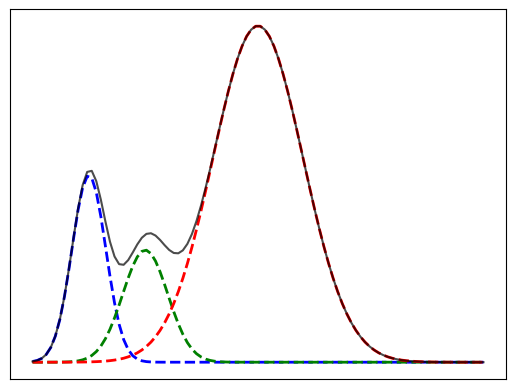

In [35]:
x = np.linspace(-3, 5, 100)
y = np.zeros(100,)
for (mu, sig), w, c in zip([(-2, .3), (-1, 0.4), (1, .8)], (0.5, 0.3, 0.9), ('b', 'g', 'r')):
    plt.plot(x, w*gaussian(x, mu, sig), '--', color=c, linewidth = 2)
    y += w*gaussian(x, mu, sig)
plt.plot(x, y, 'k', alpha = .7, linewidth = 1.5)
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

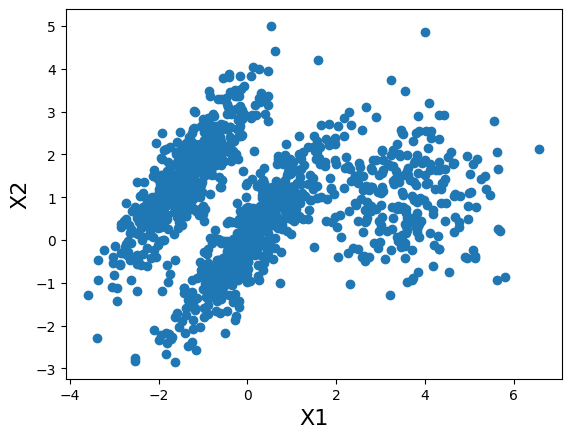

In [37]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("X1", fontsize = 16)
plt.ylabel("X2", fontsize = 16)
plt.show()

`GaussianMixture` from `Scikit-Learn`

In [38]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [39]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [40]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

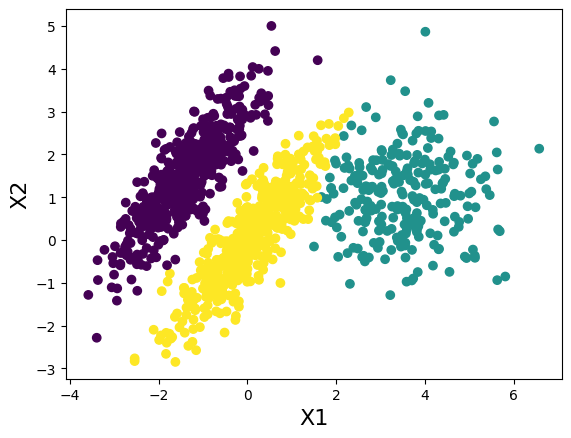

In [41]:
y_pred = gm.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.xlabel("X1", fontsize = 16)
plt.ylabel("X2", fontsize = 16)
plt.show()

In [42]:
gm.converged_

True

In [43]:
gm.n_iter_

4

In [44]:
gm.predict([[2,-1]])

array([1])

In [45]:
gm.predict_proba([[2, -1]])

array([[8.20855831e-30, 9.99999964e-01, 3.57565446e-08]])

In [46]:
# estimate the density of the model at any location.
# the greater the score, the higher the density
gm.score_samples([[2,-1]]), gm.score_samples([[0,0]])

(array([-6.60851408]), array([-1.97691239]))

density contour, mean and decision boundary

In [47]:
from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("X1", fontsize=16)
    plt.ylabel("X2", fontsize=16)

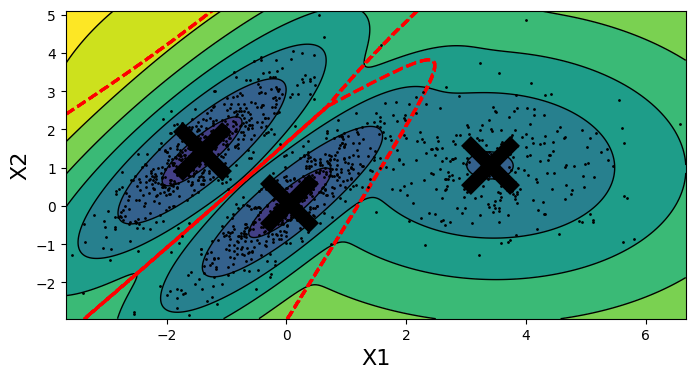

In [48]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

Hyperparameter: `covariance_type`

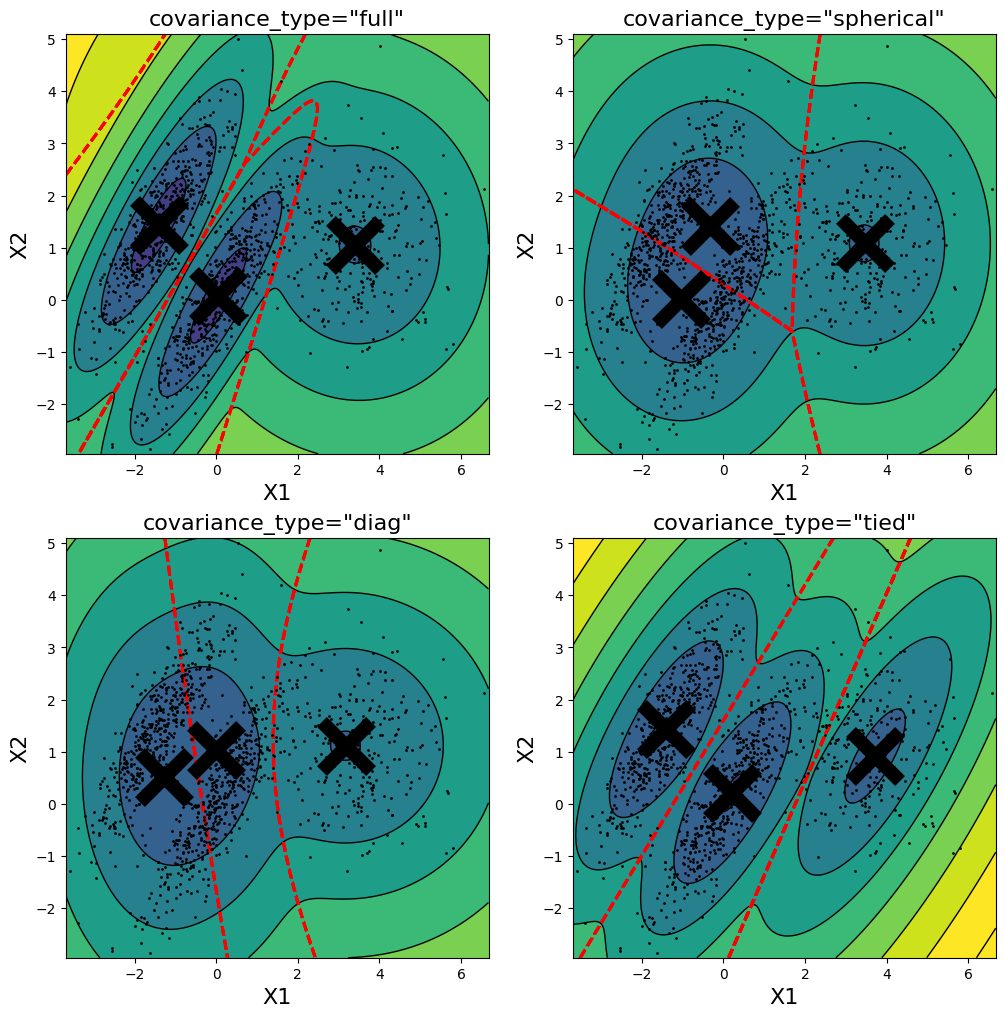

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, cov in enumerate(["full", "spherical", "diag", "tied"]):
    gm_type = GaussianMixture(n_components=3, n_init=10, covariance_type=cov, random_state=42)
    gm_type.fit(X)
    plt.sca(axes[i // 2, i % 2])
    plot_gaussian_mixture(gm_type, X)
    plt.title('covariance_type="{}"'.format(gm_type.covariance_type), fontsize=16)

**Anomaly Detection**

Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly. You must define what density threshold you want to use.

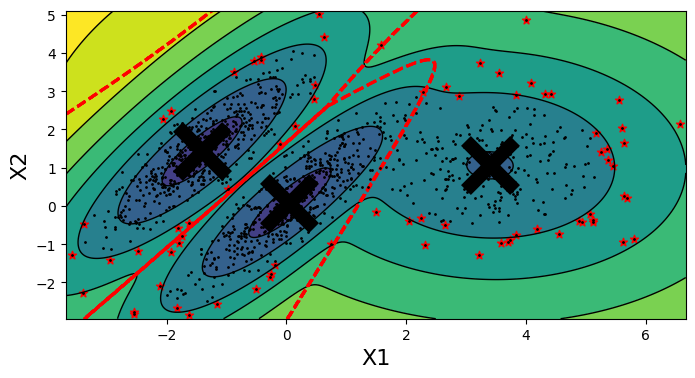

In [50]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 6)
anomalies = X[densities < density_threshold]

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.show()

**Model selection**

In [51]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(2, 11)]

bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

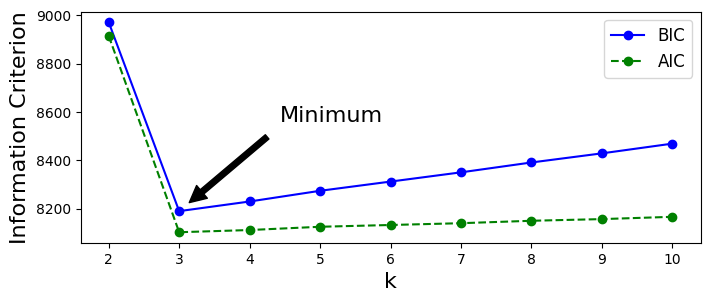

In [52]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), bics, "bo-", label="BIC")
plt.plot(range(2, 11), aics, "go--", label="AIC")
plt.xlabel("k", fontsize=16)
plt.ylabel("Information Criterion", fontsize=16)
plt.annotate('Minimum',
             xy=(3, bics[1]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend(fontsize=12)
plt.show()

We can search for best combination of values for both `n_components` and the `covariance_type` hyperparameter:

In [54]:
min_bic = np.inf

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [55]:
print(best_k, best_covariance_type)

3 full


**Bayesian Gaussian Mixtures**

In [56]:
from sklearn.mixture import BayesianGaussianMixture

In [57]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
np.round(bgm.weights_, 2)
# bgm.weights_

/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

0.01 : [0.25 0.26 0.5  0.   0.   0.   0.   0.   0.   0.  ]
10000 : [0.43 0.01 0.37 0.01 0.01 0.01 0.11 0.01 0.01 0.01]


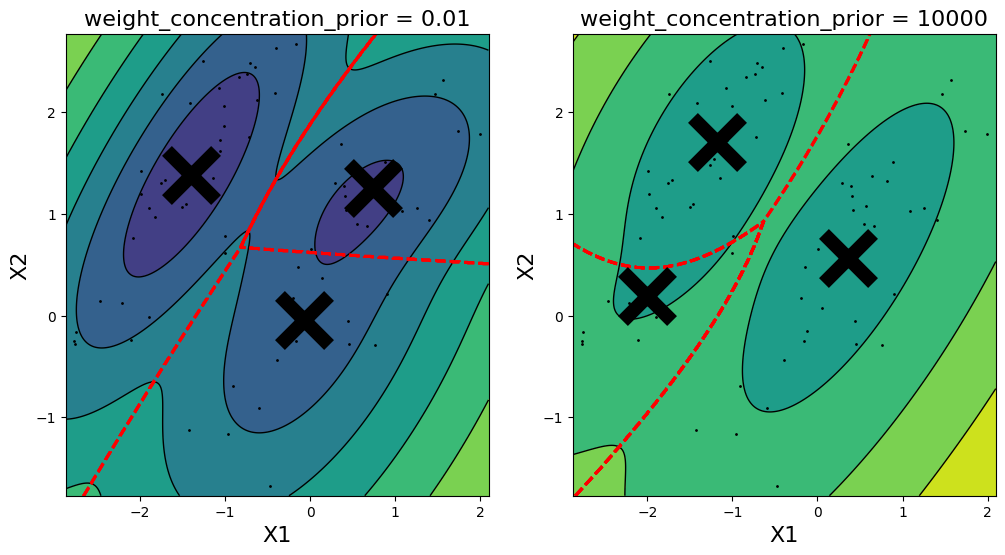

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
X_sub = X[:73]

for i, w in enumerate([0.01, 10000]):
    bgm_w = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=w, random_state=42)
    bgm_w.fit(X_sub)
    plt.sca(axes[i])
    plot_gaussian_mixture(bgm_w, X_sub)
    plt.title('weight_concentration_prior = {}'.format(w), fontsize=16)
    print('{} : {}'.format(w, np.round(bgm_w.weights_, 2)))